In [ ]:
# import numpy as np # linear algebra
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
from sklearn import metrics
from sklearn.ensemble import IsolationForest

from  scipy.spatial import distance
from matplotlib.colors import ListedColormap
from scipy.stats import chi2
import scipy as sp


In [ ]:
with open("kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [ ]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
        columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [ ]:


with open("training_attack_types",'r') as f:
    print(f.read())



back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [ ]:


attacks_types = {
'normal': 'normal',
'back': 'dos',
'buffer_overflow' :'u2r',
'ftp_write' : 'r2l',
'guess_passwd' : 'r2l',
'imap' : 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule' : 'u2r',
'multihop' :'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy' :'r2l',
'teardrop': 'dos',
'warezclient' :'r2l',
'warezmaster' :'r2l'
}



In [ ]:
path = "kddcup.data.corrected"
df = pd.read_csv(path,names=columns)

# #Adding Attack Type column
# df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0               0           tcp    http   SF        215      45076     0   
1               0           tcp    http   SF        162       4528     0   
2               0           tcp    http   SF        236       1228     0   
3               0           tcp    http   SF        233       2032     0   
4               0           tcp    http   SF        239        486     0   
...           ...           ...     ...  ...        ...        ...   ...   
4898426         0           tcp    http   SF        212       2288     0   
4898427         0           tcp    http   SF        219        236     0   
4898428         0           tcp    http   SF        218       3610     0   
4898429         0           tcp    http   SF        219       1234     0   
4898430         0           tcp    http   SF        219       1098     0   

         wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                     0       0    0  ...                   0   
1                     0       0    0  ...                   1   
2                     0       0    0  ...                   2   
3                     0       0    0  ...                   3   
4                     0       0    0  ...                   4   
...                 ...     ...  ...  ...                 ...   
4898426               0       0    0  ...                 255   
4898427               0       0    0  ...                 255   
4898428               0       0    0  ...                 255   
4898429               0       0    0  ...                 255   
4898430               0       0    0  ...                 255   

         dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                           0.0                     0.0   
1                           1.0                     0.0   
2                           1.0                     0.0   
3                           1.0                     0.0   
4                           1.0                     0.0   
...                         ...                     ...   
4898426                     1.0                     0.0   
4898427                     1.0                     0.0   
4898428                     1.0                     0.0   
4898429                     1.0                     0.0   
4898430                     1.0                     0.0   

         dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                               0.00                         0.00   
1                               1.00                         0.00   
2                               0.50                         0.00   
3                               0.33                         0.00   
4                               0.25                         0.00   
...                              ...                          ...   
4898426                         0.33                         0.05   
4898427                         0.25                         0.05   
4898428                         0.20                         0.05   
4898429                         0.17                         0.05   
4898430                         0.14                         0.05   

         dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                         0.0                      0.00                   0.0   
1                         0.0                      0.00                   0.0   
2                         0.0                      0.00                   0.0   
3                         0.0                      0.00                   0.0   
4                         0.0                      0.00                   0.0   
...                       ...                       ...                   ...   
4898426                   0.0                      0.01                   0.0   
4898427                   0.0                      0.01                   0.0   
4898428                   0.0                   

In [ ]:
df = df.loc[df['service'] == 'http']
df

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0               0           tcp    http   SF        215      45076     0   
1               0           tcp    http   SF        162       4528     0   
2               0           tcp    http   SF        236       1228     0   
3               0           tcp    http   SF        233       2032     0   
4               0           tcp    http   SF        239        486     0   
...           ...           ...     ...  ...        ...        ...   ...   
4898426         0           tcp    http   SF        212       2288     0   
4898427         0           tcp    http   SF        219        236     0   
4898428         0           tcp    http   SF        218       3610     0   
4898429         0           tcp    http   SF        219       1234     0   
4898430         0           tcp    http   SF        219       1098     0   

         wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                     0       0    0  ...                   0   
1                     0       0    0  ...                   1   
2                     0       0    0  ...                   2   
3                     0       0    0  ...                   3   
4                     0       0    0  ...                   4   
...                 ...     ...  ...  ...                 ...   
4898426               0       0    0  ...                 255   
4898427               0       0    0  ...                 255   
4898428               0       0    0  ...                 255   
4898429               0       0    0  ...                 255   
4898430               0       0    0  ...                 255   

         dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                           0.0                     0.0   
1                           1.0                     0.0   
2                           1.0                     0.0   
3                           1.0                     0.0   
4                           1.0                     0.0   
...                         ...                     ...   
4898426                     1.0                     0.0   
4898427                     1.0                     0.0   
4898428                     1.0                     0.0   
4898429                     1.0                     0.0   
4898430                     1.0                     0.0   

         dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                               0.00                         0.00   
1                               1.00                         0.00   
2                               0.50                         0.00   
3                               0.33                         0.00   
4                               0.25                         0.00   
...                              ...                          ...   
4898426                         0.33                         0.05   
4898427                         0.25                         0.05   
4898428                         0.20                         0.05   
4898429                         0.17                         0.05   
4898430                         0.14                         0.05   

         dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                         0.0                      0.00                   0.0   
1                         0.0                      0.00                   0.0   
2                         0.0                      0.00                   0.0   
3                         0.0                      0.00                   0.0   
4                         0.0                      0.00                   0.0   
...                       ...                       ...                   ...   
4898426                   0.0                      0.01                   0.0   
4898427                   0.0                      0.01                   0.0   
4898428                   0.0                   

In [ ]:

df = df.loc[df['logged_in'] >0]
#age khasti az in data set estefade koni


0          1
1          1
2          1
3          1
4          1
          ..
4898426    1
4898427    1
4898428    1
4898429    1
4898430    1
Name: duration, Length: 567498, dtype: int64

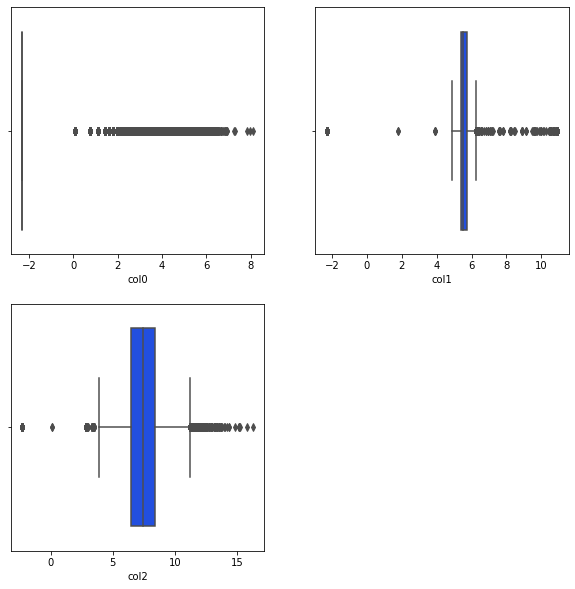

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,10))
columns = list(df.select_dtypes(include="float64").columns)
for i, c in enumerate(columns, 1):
    plt.subplot(2,2,i)
    plot=sns.boxplot(x=c, palette="bright", data=df)

In [ ]:

np.log2(df['duration'] +0.1)


0         -3.321928
1         -3.321928
2         -3.321928
3         -3.321928
4         -3.321928
             ...   
4898426   -3.321928
4898427   -3.321928
4898428   -3.321928
4898429   -3.321928
4898430   -3.321928
Name: duration, Length: 567498, dtype: float64

In [ ]:
df['target'].value_counts()

normal.       565287
back.           2203
phf.               4
satan.             2
portsweep.         1
ipsweep.           1
Name: target, dtype: int64

In [ ]:
df['service'].value_counts()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

In [ ]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# __________________________________________________________________

In [ ]:
import h5py
filepath = 'http.mat'
arrays = {}
f = h5py.File(filepath)
for k, v in f.items():
    arrays[k] = np.array(v)

<ipython-input-53-e06f8996cb79>:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(filepath)


In [ ]:
len(arrays['X'][0])

567498

In [ ]:
len(arrays['X'])

3

In [ ]:
arrays

{'X': array([[-2.30258509, -2.30258509, -2.30258509, ..., -2.30258509,
         -2.30258509, -2.30258509],
        [ 5.37110304,  5.08821343,  5.46425544, ...,  5.38495367,
          5.38952825,  5.38952825],
        [10.71610745,  8.4180577 ,  7.11322354, ...,  8.19149075,
          7.11809724,  7.00133669]]),
 'y': array([[0., 0., 0., ..., 0., 0., 0.]])}

In [ ]:
len(arrays['y'][0])

567498

In [ ]:
data = {'duration' : arrays['X'][0],'src_bytes' : arrays['X'][1],'dst_bytes' : arrays['X'][2]}
df = pd.DataFrame(data)
df

duration  src_bytes  dst_bytes
0      -2.302585   5.371103  10.716107
1      -2.302585   5.088213   8.418058
2      -2.302585   5.464255   7.113224
3      -2.302585   5.451468   7.616825
4      -2.302585   5.476882   6.186414
...          ...        ...        ...
567493 -2.302585   5.357058   7.735477
567494 -2.302585   5.389528   5.464255
567495 -2.302585   5.384954   8.191491
567496 -2.302585   5.389528   7.118097
567497 -2.302585   5.389528   7.001337

[567498 rows x 3 columns]

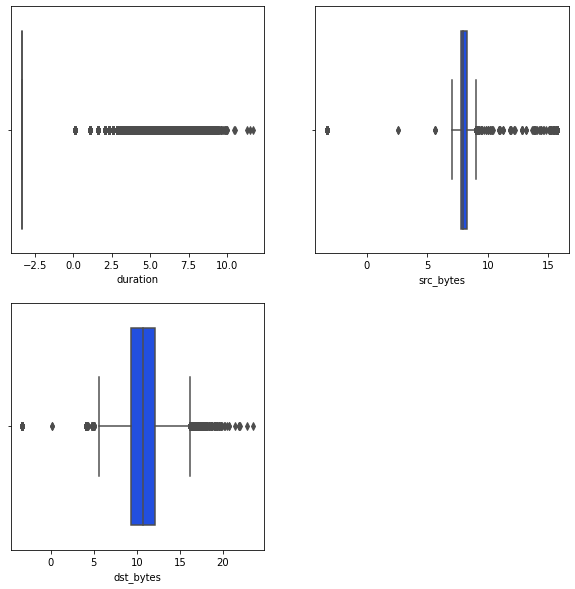

In [ ]:

df ['duration'] = np.log2(df['duration'] +0.1)
df ['src_bytes'] = np.log2(df['src_bytes'] +0.1)
df ['dst_bytes'] = np.log2(df['dst_bytes'] +0.1)

%matplotlib inline
plt.figure(figsize=(10,10))
columns = ['duration' , 'src_bytes','dst_bytes']
for i, c in enumerate(columns, 1):
    plt.subplot(2,2,i)
    plot=sns.boxplot(x=c, palette="bright", data=df)

In [ ]:
columns = ['duration' , 'src_bytes','dst_bytes']
es =[]
for col in columns :
    pl= df[ col]

    listt = pl.tolist()

    Q1 = np.percentile(listt, 25, interpolation = 'midpoint')
    Q2 = np.percentile(listt, 50, interpolation = 'midpoint')
    Q3 = np.percentile(listt , 75, interpolation = 'midpoint')
    IQR = Q3 - Q1

    e=[]
    for i in range(0,len(listt)) :
        if listt[i] > 1.5*IQR + Q3 :
            e.append(i)

        elif listt[i] < Q1 - 1.5*IQR :
            e.append(i)
    es.append(e)

#     e1=[x for x in listt if x> 1.5*IQR + Q3]
#     e2=[x for x in listt if x< Q1 - 1.5*IQR ]
#     print(  col)
#     print("Q1 , Q2 , Q3 , IQR : ",Q1 , Q2 , Q3 , IQR )
#     print("min , max :" , min(listt) , max(listt))
#     print("out of range data :" , e2+e1 , "\n\n")




In [ ]:
len(set(es[2]).intersection(es[0]).intersection(es[1]))

7

In [ ]:
df['col1']

0         5.371103
1         5.088213
2         5.464255
3         5.451468
4         5.476882
            ...   
567493    5.357058
567494    5.389528
567495    5.384954
567496    5.389528
567497    5.389528
Name: col1, Length: 567498, dtype: float64

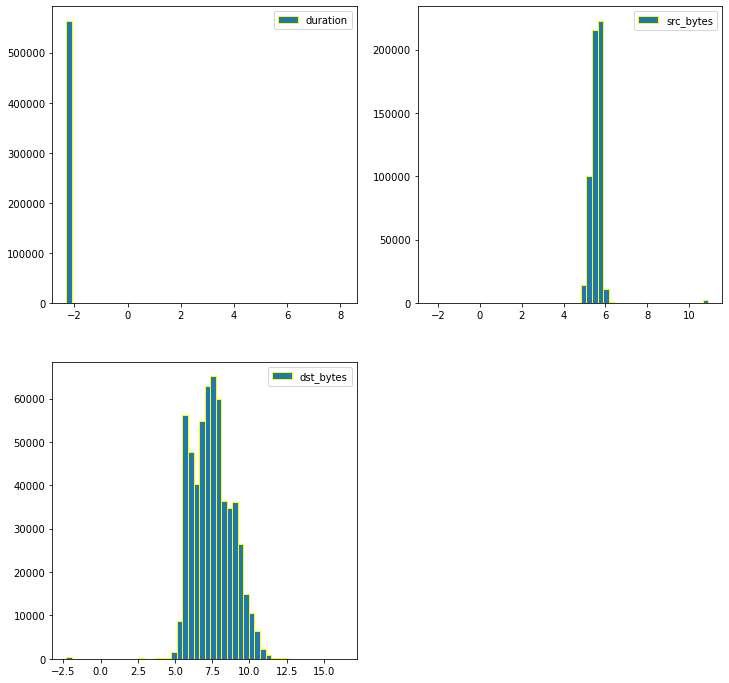

In [ ]:
%matplotlib inline
plt.figure(figsize=(12,12))
columns = ['duration' , 'src_bytes','dst_bytes']
for i, c in enumerate(columns, 1):
    plt.subplot(2,2,i)
    plt.hist(df[c], bins=50, edgecolor="yellow" , label=c)

    plt.legend(loc='upper right')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


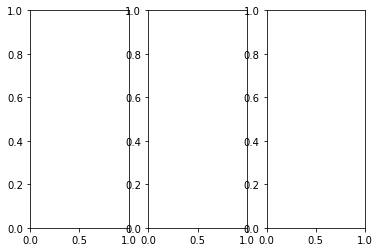

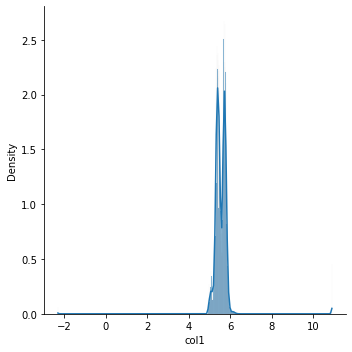

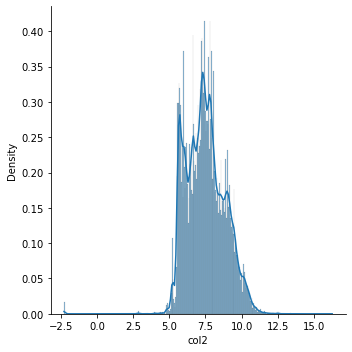

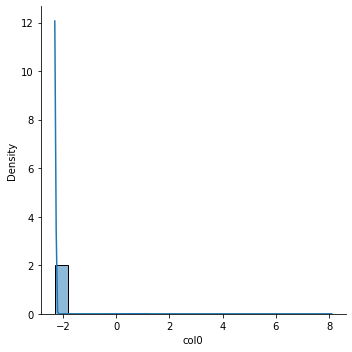

In [ ]:
cols = ['col1', 'col2', 'col0']

# create the figure and axes
fig, axes = plt.subplots(1, 3)
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.displot(data=df[col], kde=True, stat='density', ax=ax)
plt.show()


### univarient

In [ ]:
df2 = pd.DataFrame()

df2["normal_duration"] = (df["duration"] - df["duration"].mean())/df["duration"].std()
df2["normal_src_bytes"] = (df["src_bytes"] - df["src_bytes"].mean())/df["src_bytes"].std()
df2["normal_dst_bytes"] = (df["dst_bytes"] - df["dst_bytes"].mean())/df["dst_bytes"].std()


In [ ]:
y_col1n = [ 1 if abs(x) >= 3 else 0 for x in df2["normal_src_bytes"]]

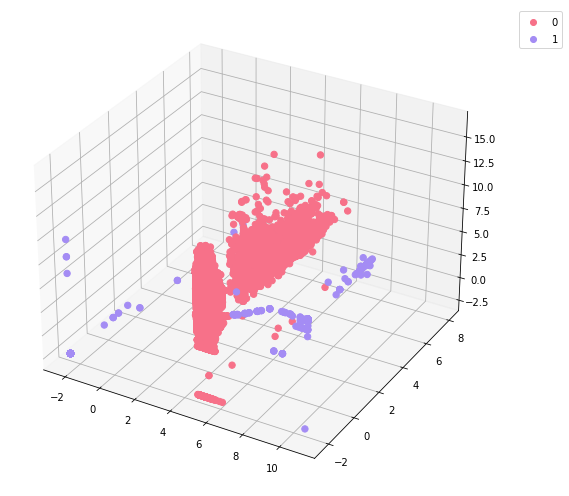

In [ ]:

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

x = df['src_bytes']
y = df['duration']
z = df['dst_bytes']

fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = ListedColormap(sns.color_palette("husl",4))
sc = ax.scatter(x, y, z, s=40, c=y_col1n,cmap=cmap, marker='o', alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

In [ ]:
conmat = confusion_matrix(arrays['y'][0],y_col1n)
val = np.mat(conmat)
classnames = list(set([0,1]))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)

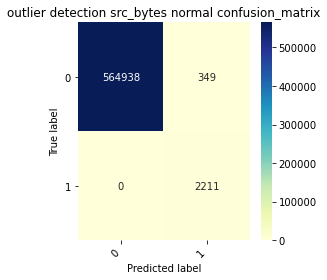

        0     1
0  564938   349
1       0  2211


In [ ]:

plt.figure(figsize = (4,4))
# plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu",fmt='g')



heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('outlier detection src_bytes normal confusion_matrix')

plt.show()
print(df_cm)

In [ ]:
from sklearn.metrics import f1_score
f1_score(arrays['y'][0], y_src_bytes)

0.9268497170404527

___________________________________________________________

In [ ]:
df2_outliers2 = df2[abs(df2["normal_dst_bytes"]) >= 3]
df2_outliers2

normal_duration  normal_src_bytes  normal_dst_bytes
316           -0.073165         -0.304107          3.716086
317           -0.073165         -0.294007          3.547678
511           -0.073165          0.034149         -3.530909
1060          -0.073165         -0.472055          3.133552
1340          -0.073165         -0.110081          3.325318
...                 ...               ...               ...
567049        -0.073165          0.359497          3.366338
567078        -0.073165          0.359497          3.501018
567079        -0.073165          0.359497          3.366338
567306        -0.073165        -18.069302         -7.435032
567473        -0.073165         -0.641495         -7.435032

[1212 rows x 3 columns]

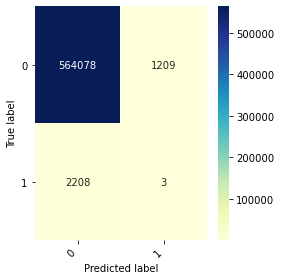

        0     1
0  564078  1209
1    2208     3


In [ ]:

y_col2n = [ 1 if abs(x) >= 3 else 0 for x in df2["normal_dst_bytes"]]

conmat = confusion_matrix(arrays['y'][0],y_col2n)
val = np.mat(conmat)
classnames = list(set([0,1]))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)


plt.figure(figsize = (4,4))
# plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu",fmt='g')


heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')


plt.show()
print(df_cm)


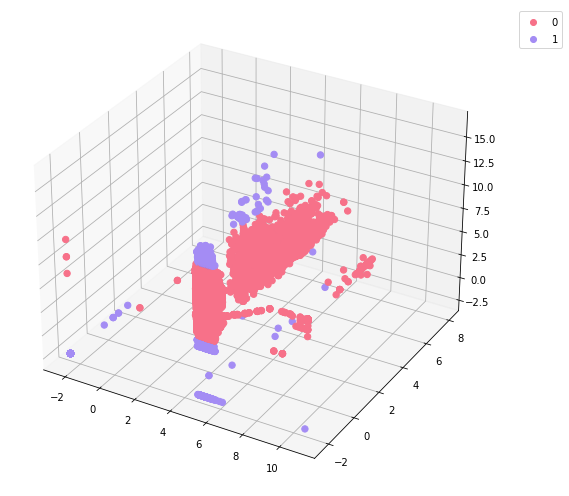

In [ ]:

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

x = df['src_bytes']
y = df['duration']
z = df['dst_bytes']

fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = ListedColormap(sns.color_palette("husl",4))
sc = ax.scatter(x, y, z, s=40, c=y_col2n,cmap=cmap, marker='o', alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(arrays['y'][0], y_col2n)

0.0017528483786152496

#### normal_duration

In [ ]:
df2_outliers0 = df2[abs(df2["normal_duration"]) >= 3]
df2_outliers0

normal_duration  normal_src_bytes  normal_dst_bytes
336           11.527144         -0.549576         -1.092844
350           13.677009         -0.549576         -1.092844
377           14.239988          0.492116         -1.092844
396           16.283138          0.492116         -1.092844
1014          13.011806          0.351901         -1.365643
...                 ...               ...               ...
566971        10.708651          0.194440         -1.782086
566991         7.907066          0.226807         -1.357988
566994        10.561406         -0.538340         -1.357988
567037        15.449238         -0.493938         -1.734775
567038        12.581660          0.298008         -1.734775

[3305 rows x 3 columns]

In [ ]:
#__________________________________________________________________

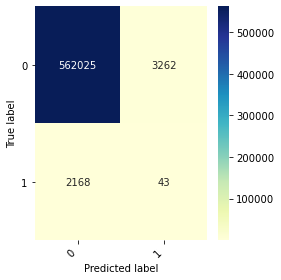

        0     1
0  562025  3262
1    2168    43


In [ ]:
# df2_outliers1 = df2[abs(df2["normal_col0"]) >= 3]
y_col0n = [ 1 if abs(x) >= 3 else 0 for x in df2["normal_duration"]]

conmat = confusion_matrix(arrays['y'][0],y_col0n)
val = np.mat(conmat)
classnames = list(set([0,1]))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)

plt.figure(figsize = (4,4))
# plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu",fmt='g')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')


plt.show()

print( df_cm)


In [ ]:
from sklearn.metrics import f1_score
f1_score(arrays['y'][0], y_col0n)

0.01559100797679478

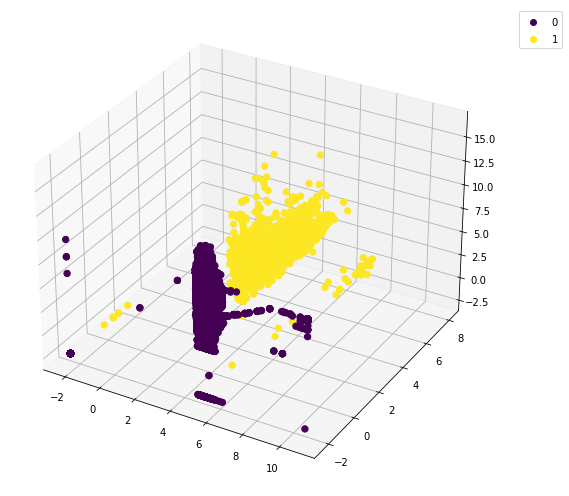

In [ ]:

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

x = df['src_bytes']
y = df['duration']
z = df['dst_bytes']

fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = ListedColormap(sns.color_palette("husl",4))
sc = ax.scatter(x, y, z, s=40, c=y_col0n,cmap=cmap, marker='o', alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

## Detection of Multivariate Outliers

In [ ]:
from scipy.stats import multivariate_normal#calculate the covariance matrix
data = np.stack((df['col1'],df['col0']),axis=0)
covariance_matrix = np.cov(data)

#calculating the mean
mean_values = [np.mean(df['col1']),np.mean(df['col0'])]

#multivariate normal distribution
model = multivariate_normal(cov=covariance_matrix,mean=mean_values)
data = np.stack((df['col1'],df['col0']),axis=1)

#finding the outliers
threshold = 1.0e-09
outlier = model.pdf(data).reshape(-1) < threshold

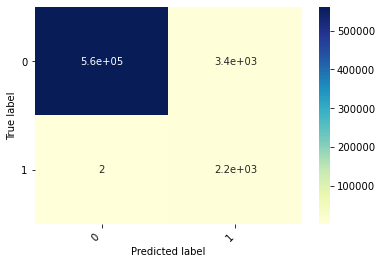

        0     1
0  561915  3372
1       2  2209


In [ ]:
conmat = confusion_matrix(arrays['y'][0],y_hat)
val = np.mat(conmat)
classnames = list(set([0,1]))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)


plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')


plt.show()
print(df_cm)

In [ ]:
y_hat = []
for i,  boolean in enumerate(outlier):
    if boolean == True:
        y_hat.append(1)
    else :
        y_hat.append(0)
print(y_hat)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
from  scipy.spatial import distance

In [ ]:
def mahalanobis_distances(df, axis=0):
    df = df.transpose() if axis == 1 else df
    means = df.mean()
    try:
        inv_cov = np.linalg.inv(df.cov())
    except LinAlgError:
        return pd.Series([np.NAN] * len(df.index), df.index,
                         name='Mahalanobis')
    dists = []
    for i, sample in df.iterrows():
        dists.append(distance.mahalanobis(sample, means, inv_cov))

    return pd.Series(dists, df.index, name='Mahalanobis')

In [ ]:
mahalanobis_distances = mahalanobis_distances(df)

In [ ]:
mahalanobis_distances

0         2.533064
1         1.341270
2         0.355741
3         0.277766
4         1.005044
            ...   
567493    0.515881
567494    1.569989
567495    0.693274
567496    0.468976
567497    0.523150
Name: Mahalanobis, Length: 567498, dtype: float64

In order to detect outliers, we should specify a threshold; but since the square of Mahalanobis Distances follow a Chi-square distribution with a degree of freedom = number of feature in the dataset, then we can choose a threshold of say 0.95, then we can use chi2.cdf method from Scipy, like this:

In [ ]:
#https://stackoverflow.com/questions/46827580/multivariate-outlier-removal-with-mahalanobis-distance
#https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33
#
#https://blog.clairvoyantsoft.com/mlmuse-approaches-to-outlier-detection-part-2-2ecb909a98f9

In [ ]:
chi2.ppf(0.96, df=3 )

8.606947404377836

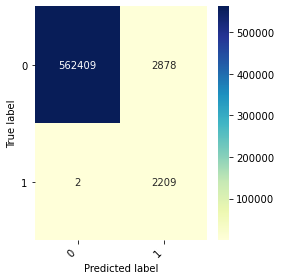

        0     1
0  562409  2878
1       2  2209


In [ ]:
mahalanobis_distances_out= [ 1 if abs(x) >= 8.6 else 0 for x in mahalanobis_distances]

conmat = confusion_matrix(arrays['y'][0],mahalanobis_distances_out)
val = np.mat(conmat)
classnames = list(set([0,1]))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)


plt.figure(figsize = (4,4))
# plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu",fmt='g')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')


plt.show()
print(df_cm)

In [ ]:
from sklearn.metrics import f1_score
f1_score(arrays['y'][0], mahalanobis_distances_out)

0.6053713346122226

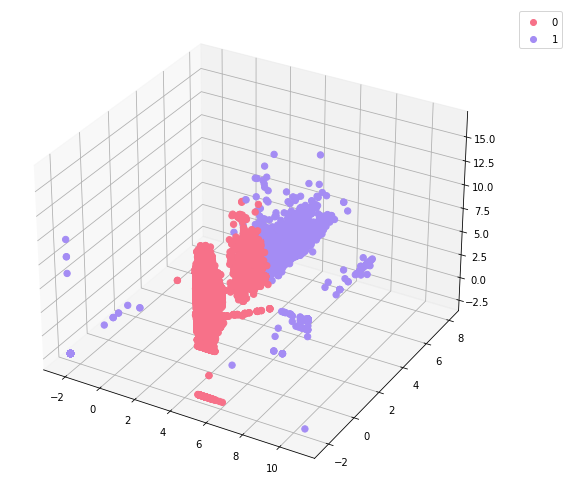

In [ ]:
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

x = df['src_bytes']
y = df['duration']
z = df['dst_bytes']

fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = ListedColormap(sns.color_palette("husl",4))
sc = ax.scatter(x, y, z, s=40, c=mahalanobis_distances_out,cmap=cmap, marker='o', alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

## Isolation Forest

In [ ]:
x = df.values
x

array([[-2.30258509,  5.37110304, 10.71610745],
       [-2.30258509,  5.08821343,  8.4180577 ],
       [-2.30258509,  5.46425544,  7.11322354],
       ...,
       [-2.30258509,  5.38495367,  8.19149075],
       [-2.30258509,  5.38952825,  7.11809724],
       [-2.30258509,  5.38952825,  7.00133669]])

In [ ]:
clf = IsolationForest()
clf.fit(x)
predictions = clf.predict(x)

In [ ]:
predictions

array([-1, -1,  1, ...,  1,  1,  1])

In [ ]:
isolation_forest_out= [ 1 if x==-1 else 0 for x in predictions]

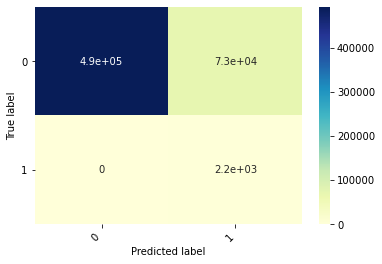

        0      1
0  492600  72687
1       0   2211


In [ ]:
conmat = confusion_matrix(arrays['y'][0],isolation_forest_out)
val = np.mat(conmat)
classnames = list(set([0,1]))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)


plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')


plt.show()
print(df_cm)

In [ ]:
clf = IsolationForest(contamination=.006)
clf.fit(x)
predictions = clf.predict(x)

In [ ]:
isolation_forest_out= [ 1 if x==-1 else 0 for x in predictions]
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(arrays['y'][0], isolation_forest_out)
mae

0.0021215933800647754

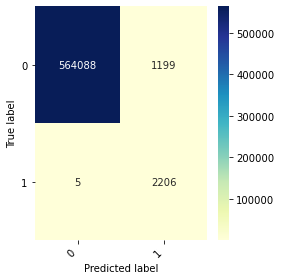

        0     1
0  564088  1199
1       5  2206


In [ ]:
isolation_forest_out= [ 1 if x==-1 else 0 for x in predictions]
conmat = confusion_matrix(arrays['y'][0],isolation_forest_out)
val = np.mat(conmat)
classnames = list(set([0,1]))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)


plt.figure(figsize = (4,4))
# plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu",fmt='g')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')


plt.show()
print(df_cm)

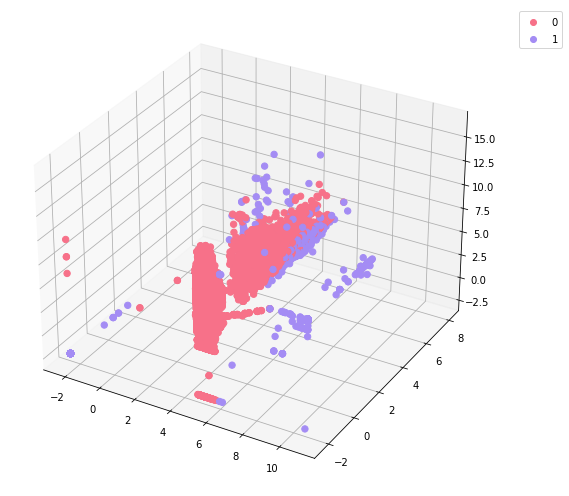

In [ ]:

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True
x = df['src_bytes']
y = df['duration']
z = df['dst_bytes']

fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = ListedColormap(sns.color_palette("husl",4))
sc = ax.scatter(x, y, z, s=40, c=isolation_forest_out,cmap=cmap, marker='o', alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(arrays['y'][0], isolation_forest_out)

0.7856125356125355

# شکل اصلی

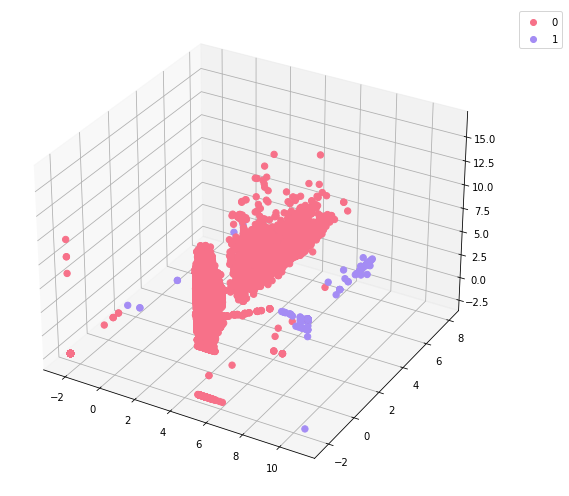

In [ ]:

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

x = df['col1']
y = df['col0']
z = df['col2']

fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = ListedColormap(sns.color_palette("husl", 4).as_hex())
sc = ax.scatter(x, y, z, s=40, c=arrays['y'], marker='o',cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

## db scan

In [ ]:
from sklearn.cluster import DBSCAN
db_scan_outlier_detection = DBSCAN(eps = 500, min_samples = 1500)
x=db_scan_outlier_detection.fit(df)
# clustering = DBSCAN(eps=160, min_samples=1500).fit(pca_data)


In [ ]:
x.labels_

AttributeError: 'DBSCAN' object has no attribute 'labels_'

### LOF

In [ ]:
# fit the model for outlier detection (default)
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=50, contamination=0.004)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(df)
# X_scores = clf.negative_outlier_factor_
y_pred

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, yhat)

## EllipticEnvelope

In [ ]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(contamination=.008,random_state=0)
clf.fit(df)
ee_scores = pd.Series(clf.decision_function(df))
ee_predict = clf.predict(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.774638916510558 > -70.159977915462179). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.762797381743010 > -70.143967235371790). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.776785235769695 > -70.166398297824713). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.419569427702488 > -66.045499606583292). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.422494138003133 > -66.558072110943357). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.472445180670105 > -70.581160169832771). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.335725600795154 > -70.482162226369041). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.340017520689112 > -70.452062565726422). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.303556841265755 > -70.452451777238039). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.842262923099137 > -70.490537936308996). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.850284045485201 > -70.486410375653946). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.761420536015960 > -68.534258555523678). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.225615807379228 > -68.153420249216950). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.300198604742876 > -70.524727489989544). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.907368524813255 > -70.420347124261241). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.614306989676938 > -70.358320114294898). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.629309463650461 > -70.428905958070516). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.441383128308305 > -65.280786893397377). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.267619028679595 > -70.658833975577579). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.267619028679595 > -70.668839292199962). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.086387530505927 > -70.396400182640619). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.805773523552500 > -70.539959436829534). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.797639056975266 > -70.495374636559831). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.765420864245980 > -70.481893533288471). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.120557081152805 > -70.461252365304659). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.863922491024316 > -68.486525802673810). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.985896877903300 > -70.425891058002833). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.442857516410402 > -70.143461809883817). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.446721901438789 > -70.159646842728691). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.368125517855693 > -70.038785780539740). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.162026178735402 > -70.272462270327750). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.106392632878419 > -66.563015129614797). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.015555772793535 > -70.057824576113077). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.786826020629558 > -70.144121583934350). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.778658456295323 > -70.130823262090999). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.803541905100502 > -70.128983455230355). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.892679053896359 > -70.294543161279407). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.943523135553344 > -70.345302994910199). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.930809536219289 > -70.345848093843728). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.921355469931986 > -65.261986489610351). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.921355469931986 > -65.297724678863631). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.589473510669276 > -68.292269751158940). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.920627884003973 > -70.776380283731015). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.919706256852924 > -70.794210188163490). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.902833830027153 > -70.721677573745396). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.601709216725954 > -68.492395911161680). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.801587334129265 > -70.622918358339277). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.687859943519154 > -66.259291858308572). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.103499927741057 > -66.165599405864214). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.167531076895457 > -70.570383182717009). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.164451904362011 > -70.548226366920886). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.389138864237421 > -70.241403545478008). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.291611472332852 > -68.179677764850410). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.388662897532662 > -70.270214749083735). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.003046548064764 > -70.523588176906898). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.009699306311361 > -70.487593525780426). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.962143085920860 > -65.988986875399604). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.284061406143486 > -70.316052241009871). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.611804721121068 > -68.373894359632700). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.668606470893383 > -70.454443478894589). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.440850283105302 > -66.667770192928657). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.451606078144442 > -70.566686961876727). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.733696873166251 > -68.326208152341877). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.922693804135005 > -70.470607337363319). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.934600847305691 > -70.538865015399537). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.943573894744483 > -70.532257403648188). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.790722526035220 > -70.159970707418651). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.847376239042680 > -66.682949674339554). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.873008877504034 > -70.282657471084718). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.070525629852849 > -68.294972183165868). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.119372621052962 > -68.207139109038067). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.783281784699305 > -70.072543523567290). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.649379459683042 > -66.833584189646686). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.728069933905671 > -70.422737152845500). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.664050762923064 > -66.752472510826706). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.764314760563747 > -70.366378334097718). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.790191598784590 > -66.491428665333004). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.828212427377101 > -70.518310783907239). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.359061264857727 > -70.795157049971877). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.381060720673893 > -70.905268089531162). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.394087781671963 > -70.938006315273398). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.617627848862872 > -70.200883922544278). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.578186527141852 > -70.223819763918343). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.640188133683610 > -70.244417707436824). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.837466888026436 > -70.415066129943867). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.340061399309729 > -70.214313092223946). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.886171636989880 > -70.244296962869541). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.066563712090472 > -70.299033304999256). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.089131684788132 > -70.375463983156379). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.087887418236672 > -70.364125916026836). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.915864674480019 > -66.870869102735284). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.918816442401946 > -70.805593747132789). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.896397451151017 > -66.949677205268870). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.093239644921079 > -70.395509256687561). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.088663593310594 > -70.383507293617555). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.093239644921079 > -70.402646463794824). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.628989607020412 > -70.279046556494549). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.672092912927752 > -70.311899851486231). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.640592524980104 > -70.271770010367561). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.980303344638557 > -70.556240954597143). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.987215376909671 > -70.551821157497415). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.984103919879413 > -70.558631499481365). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.025553237902240 > -70.091460030622045). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.015852404576773 > -70.056146275941103). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.877747722438171 > -68.186846182995737). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.903422886929316 > -70.060510645539040). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.964555392956989 > -70.255593049002698). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.849874100550593 > -70.028378353842186). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.219066160351321 > -66.644348741251761). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.980407760556063 > -68.340593774981969). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.979911509440075 > -68.407488917959796). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.472594116836915 > -70.524986124084890). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.484723736173226 > -70.541510006367432). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.472594116836915 > -70.527132582065860). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.349498167821249 > -70.434032656466599). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.456685974528889 > -70.657786183761573). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.455780277624364 > -66.775005763301877). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.460161351797927 > -70.552273528785250). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.437441354812639 > -70.526520545796529). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.294237747674123 > -70.324558808494629). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.986136081718772 > -68.406230528446869). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.121813760680108 > -70.344580016013964). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.058094532362327 > -68.507625413688487). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.373508278452613 > -70.249414855438914). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.379041834881312 > -70.237801395117941). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.331781331219877 > -66.740893002279137). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.780613935058985 > -70.446441011855384). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.767628055637698 > -70.437804783746344). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.755805331617021 > -70.408898754883708). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.665638597024244 > -69.952856846914003). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.590599337952439 > -68.159667882340074). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.636452727551858 > -69.912568717431142). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.896960543074236 > -68.594059430031990). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.887238922402608 > -68.464051702302342). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.999783697969119 > -70.356690810115651). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.141562145276730 > -68.388583575745827). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.095394889838937 > -68.214189165110710). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.287163155796904 > -70.340851644743850). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.936979956854421 > -70.190620456368862). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.027359677692381 > -70.317097772731671). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.975166031863369 > -70.212858764422606). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.049124780756853 > -70.211890814556796). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.062971896408289 > -70.239826558467428). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.880803498751411 > -68.120425951616028). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.525515999844814 > -68.541319639339790). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.548582577467267 > -70.333044569609839). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.463295499628235 > -68.103933570946893). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.926341252871350 > -70.290440070145465). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.939539462870608 > -70.297837916938917). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.917661555515161 > -70.316361714626467). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.396370384138982 > -70.255243474339480). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.559155608695404 > -68.487471421426790). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.432354129914664 > -70.288722632515316). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.944157287392576 > -70.617768398727762). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.960077794179574 > -70.665784517555679). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.963172274582885 > -70.663528845779723). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.827311229550327 > -70.361891122955839). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.816284737427222 > -70.337717020125666). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.759169976652965 > -70.255532076631766). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.417448765410157 > -68.343379812780327). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.161574765391896 > -70.586599589354321). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.654456971299115 > -68.266471231908383). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.860601566658512 > -70.208470555280186). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.899368249549744 > -70.295865496330933). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.902953564527745 > -70.310978159076541). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.419290960136919 > -70.295655242884337). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.382151852045359 > -68.377657596671511). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.410661941544817 > -70.236339197103916). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.696756043341880 > -68.460470203470678). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.743441693292409 > -68.548461173484952). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.941863705387617 > -70.396460874216430). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.528086458404097 > -70.402205559332188). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.619681804225094 > -70.496115504620619). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.552887575530059 > -70.400121492673364). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.920105394709831 > -70.754654339057254). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.890993731315223 > -66.895396397201452). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.908932270085609 > -66.275076318446935). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.684816078104729 > -70.311948225488976). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.703381095798489 > -70.255161059652693). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.570841894539913 > -68.462707535311765). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.897399615944477 > -68.246366764623431). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.116580378134000 > -70.347200380582308). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.116580378134000 > -70.357395898146308). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.926667433366771 > -70.524986182904854). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.708547680280271 > -68.421539734689617). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.759103013460314 > -68.485676555537026). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.574899345067945 > -68.193050436507690). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.211652835320468 > -70.222832814399752). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.039471983193119 > -66.157319856943673). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.891785207759161 > -70.445455855896370). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.816450277937314 > -66.594684674794735). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.914600474879322 > -70.524473614778074). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.401348595481029 > -70.352472898065145). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.432116864240435 > -70.572443926887189). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.434306028508923 > -70.573083397821520). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.985893450654242 > -66.691428623105580). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.028779551665298 > -70.525489563425097). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.032551214607771 > -70.546948033967425). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.799279509469577 > -68.347411500845880). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.840814276354188 > -68.302571796452057). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.882596348775971 > -70.199243949212516). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.212687752134150 > -68.333927936444695). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.249962998223554 > -70.356688362600622). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.190782343111535 > -68.300905550217635). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.308750902281542 > -70.592019875198389). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.067381549366185 > -70.629100572490714). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.064925201236257 > -66.918966974604217). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.692673365048666 > -70.021930577368764). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.363238191279741 > -70.095984127541570). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.307722593682803 > -70.008031196707293). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.759313866881656 > -68.479103338596559). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.738398411343550 > -70.154604241835443). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.875104557168805 > -70.290186506932372). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.620465587765277 > -70.330449147309196). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.619404337372015 > -70.319839619836827). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.466993029575615 > -66.612520553598074). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.778140956561074 > -70.210873713337492). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.682840659973715 > -68.264470256788144). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.733359390912566 > -70.210546895636483). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.854286531005354 > -70.304292589770753). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.869268737877651 > -70.326442185122957). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.861373411936236 > -70.330214568972806). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.703069471077301 > -70.286708963821766). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.668993338693473 > -70.263949699219395). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.726542899069511 > -70.343097972585781). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.022869861875433 > -70.761712451503556). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.069172992900841 > -70.815119859221312). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.046957810515429 > -70.799949146494114). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.555215256833582 > -66.411340122558897). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.529814211932140 > -66.385934522433999). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.531619846942971 > -66.402921738383313). You m

In [ ]:
set(ee_predict)

{-1, 1}

In [ ]:
ee_out= [ 1 if x==-1 else 0 for x in ee_predict]

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(arrays['y'][0], ee_out)
mae

0.004109265583314831

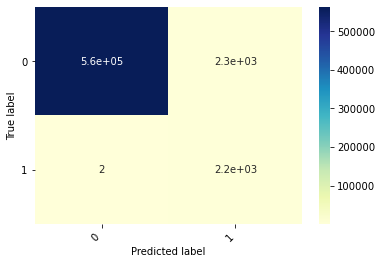

        0     1
0  562957  2330
1       2  2209


In [ ]:

conmat = confusion_matrix(arrays['y'][0],ee_out)
val = np.mat(conmat)
classnames = list(set([0,1]))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)


plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')


plt.show()
print(df_cm)

In [ ]:
from sklearn.covariance import EllipticEnvelope
clf2 = EllipticEnvelope(contamination=.004,random_state=0)
clf2.fit(df)
ee_scores2 = pd.Series(clf.decision_function(df))
ee_predict2 = clf2.predict(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.774638916510558 > -70.159977915462179). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.762797381743010 > -70.143967235371790). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.776785235769695 > -70.166398297824713). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.475744440476418 > -70.574144882181798). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.419569427702488 > -66.045499606583292). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.422494138003133 > -66.558072110943357). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.335725600795154 > -70.482162226369041). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.340017520689112 > -70.452062565726422). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.303556841265755 > -70.452451777238039). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.789961839060567 > -68.519180052567762). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.843020492600617 > -70.464741044801698). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.842262923099137 > -70.490537936308996). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.509807754898143 > -69.971445953960895). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.549398053678845 > -70.056611235205551). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.599105528099331 > -70.101435699889734). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.704021628254161 > -70.545658350245276). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.580165400482221 > -70.394888968476906). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.706482161956951 > -70.560382346110913). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.614306989676938 > -70.358320114294898). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.629309463650461 > -70.428905958070516). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.441383128308305 > -65.280786893397377). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.351905113480276 > -68.280276646361614). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.688988298306019 > -70.276680784590269). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.697513240040845 > -70.285645409531114). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.913865598282737 > -70.349155744689170). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.899232568904719 > -70.336682688071761). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.554003653431463 > -70.377755754658523). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.808802839993154 > -70.159913879334724). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.797668883705824 > -70.112345093320627). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.807696055995438 > -70.135575976955991). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.666621045038728 > -70.001760923675761). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.735086336655312 > -70.061074203471506). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.606575819584450 > -68.276651868485544). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.442857516410402 > -70.143461809883817). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.446721901438789 > -70.159646842728691). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.368125517855693 > -70.038785780539740). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.412065594141534 > -68.288334389485300). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.515686480499292 > -66.713834804304341). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.523821241854696 > -70.260065182039270). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.424095974607159 > -70.542470249797177). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.081780357639722 > -70.517085026197648). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.430279094568095 > -70.548999435590872). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.791065120518248 > -70.193067449490385). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.611321852578045 > -70.339739225265035). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.844780652295901 > -70.249785218195626). You m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.921355469931986 > -65.261986489610351). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.921355469931986 > -65.297724678863631). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.589473510669276 > -68.292269751158940). You m

KeyboardInterrupt: 

In [ ]:
ee_predict2 = clf2.predict(df)

In [ ]:
ee_out2= [ 1 if x==-1 else 0 for x in ee_predict2]

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(arrays
                          ['y'][0], ee_out2)
mae

0.0043594867294686505

In [ ]:
from sklearn.metrics import f1_score
f1_score(arrays['y'][0], ee_out)

0.6545185185185185

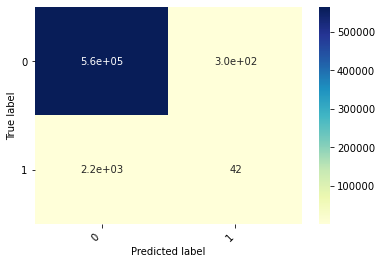

        0    1
0  564982  305
1    2169   42


In [ ]:
conmat = confusion_matrix(arrays['y'][0],ee_out2)
val = np.mat(conmat)
classnames = list(set([0,1]))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)


plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')


plt.show()
print(df_cm)

# lof

eftezah

In [ ]:
# fit the model for outlier detection (default)
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=25, contamination=0.004)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(df)
# X_scores = clf.negative_outlier_factor_
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
set(y_pred)

{-1, 1}

In [ ]:
lof_out2= [ 1 if x==-1 else 0 for x in y_pred]
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(arrays['y'][0], lof_out2)
mae

0.007869631258612364

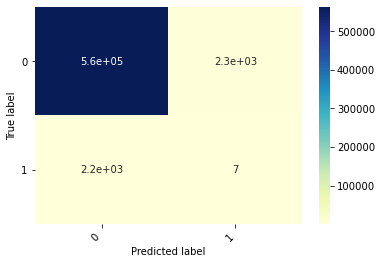

        0     1
0  563025  2262
1    2204     7


In [ ]:

conmat = confusion_matrix(arrays['y'][0],lof_out2)
val = np.mat(conmat)
classnames = list(set([0,1]))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)


plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')


plt.show()
print(df_cm)

In [ ]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(gamma=0.05).fit(df)
clf.predict(df)